In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import pickle
import requests
import os
from bs4 import BeautifulSoup
import time, random
import seaborn as sns

In [11]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingRandomSearchCV, HalvingGridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/archana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/archana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/archana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
with open('data/books_df_clean.pkl', 'rb') as f:
    books_df = pickle.load(f)

In [6]:
books_df['NewGenre'] = np.where(books_df['NewGenre'] == '', np.nan, books_df['NewGenre'])
books_df.isna().sum()

Title               0
BookId              0
Author              0
PublishedDate    2729
Genre            1490
Summary             0
NewGenre         3270
Fiction             0
dtype: int64

In [7]:
books_df_clean = books_df.dropna(subset=['NewGenre'])
books_df_clean.isna().sum()

Title               0
BookId              0
Author              0
PublishedDate    1696
Genre             673
Summary             0
NewGenre            0
Fiction             0
dtype: int64

In [8]:
books_df_clean['NewGenre'].value_counts()

NewGenre
fantasy       2930
mystery       1154
historical     636
romance        545
thriller       491
humor          458
horror         398
philosophy     228
crime          133
science         78
roman           37
comedy           8
Name: count, dtype: int64

In [9]:
books_df_clean['Fiction'].value_counts()

Fiction
1    6845
0     251
Name: count, dtype: int64

In [15]:
le = LabelEncoder()
books_df_clean_ext = books_df_clean.copy()
books_df_clean_ext['GenreNum'] = le.fit_transform(books_df_clean_ext['NewGenre'])
books_df_clean_ext['CollectiveSummary'] = books_df_clean_ext['Title'] + " " + books_df_clean_ext['Summary']

In [30]:
books_df_clean_ext.head()

,Title,BookId,Author,PublishedDate,Genre,Summary,NewGenre,Fiction,GenreNum,CollectiveSummary
0,Animal Farm,170448,George Orwell,1945-08-17,Roman à clef Satire Children's literature Spec...,"Old Major, the old boar on the Manor Farm, ca...",fantasy,1,2,"Animal Farm Old Major, the old boar on the Ma..."
1,A Clockwork Orange,41817486,Anthony Burgess,1962,Science Fiction Novella Speculative fiction Ut...,"Alex, a teenager living in near-future Englan...",horror,1,4,"A Clockwork Orange Alex, a teenager living in..."
2,The Plague,11989,Albert Camus,1947,Existentialism Fiction Absurdist fiction Novel,The text of The Plague is divided into five p...,philosophy,1,7,The Plague The text of The Plague is divided ...
3,An Enquiry Concerning Human Understanding,130119,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,philosophy,0,7,An Enquiry Concerning Human Understanding The...
4,A Fire Upon the Deep,77711,Vernor Vinge,NaN,Hard science fiction Science Fiction Speculati...,The novel posits that space around the Milky ...,fantasy,1,2,A Fire Upon the Deep The novel posits that sp...


In [34]:
document = books_df_clean_ext['Summary'].iloc[0]
document

' Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, Beasts of England. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a philosophy. The animals revolt and drive the drunken and irresponsible Mr Jones from the farm, renaming it "Animal Farm". They adopt Seven Commandments of Animal-ism, the most important of which is, "All animals are equal". Snowball attempts to teach the animals reading and writing; food is plentiful, and the farm runs smoothly. The pigs elevate themselves to positions of leadership and set aside special food items, ostensibly for their personal health. Napoleon takes the pups from the farm dogs and trains them privately. Napoleon and Snowball struggle for leadership. When Snowball announces his plans to build a windmill, Napoleon has his dogs chase Snowball away and declares himself leader. Napol

In [35]:
word_tokens = word_tokenize(document)
stopwords_punct = set(punctuation)
stop_words = set(stopwords.words('english'))
all_stop_words = stopwords_punct.union(stop_words)
all_stop_words = all_stop_words.union(set(["''", "``"]))
filtered_tokens = [w for w in word_tokens if not w.lower() in all_stop_words]
filtered_tokens

['Old',
 'Major',
 'old',
 'boar',
 'Manor',
 'Farm',
 'calls',
 'animals',
 'farm',
 'meeting',
 'compares',
 'humans',
 'parasites',
 'teaches',
 'animals',
 'revolutionary',
 'song',
 'Beasts',
 'England',
 'Major',
 'dies',
 'two',
 'young',
 'pigs',
 'Snowball',
 'Napoleon',
 'assume',
 'command',
 'turn',
 'dream',
 'philosophy',
 'animals',
 'revolt',
 'drive',
 'drunken',
 'irresponsible',
 'Mr',
 'Jones',
 'farm',
 'renaming',
 'Animal',
 'Farm',
 'adopt',
 'Seven',
 'Commandments',
 'Animal-ism',
 'important',
 'animals',
 'equal',
 'Snowball',
 'attempts',
 'teach',
 'animals',
 'reading',
 'writing',
 'food',
 'plentiful',
 'farm',
 'runs',
 'smoothly',
 'pigs',
 'elevate',
 'positions',
 'leadership',
 'set',
 'aside',
 'special',
 'food',
 'items',
 'ostensibly',
 'personal',
 'health',
 'Napoleon',
 'takes',
 'pups',
 'farm',
 'dogs',
 'trains',
 'privately',
 'Napoleon',
 'Snowball',
 'struggle',
 'leadership',
 'Snowball',
 'announces',
 'plans',
 'build',
 'windmill',

In [36]:
from collections import Counter
cnt = Counter()

for word in filtered_tokens:
    cnt[word] += 1

cnt.most_common(20)

[('animals', 23),
 ('Napoleon', 19),
 ('pigs', 12),
 ('animal', 11),
 ('farm', 9),
 ('Snowball', 9),
 ('shall', 9),
 ('Squealer', 8),
 ('humans', 7),
 ('equal', 6),
 ('windmill', 6),
 ('Seven', 5),
 ('Commandments', 5),
 ('Farm', 4),
 ('Mr', 4),
 ('alcohol', 4),
 ('commandments', 4),
 ('legs', 4),
 ('two', 3),
 ('attempts', 3)]

In [37]:
word_freq = pd.DataFrame(cnt.most_common(20),
                             columns=['words', 'count'])
word_freq.head()

,words,count
0,animals,23
1,Napoleon,19
2,pigs,12
3,animal,11
4,farm,9


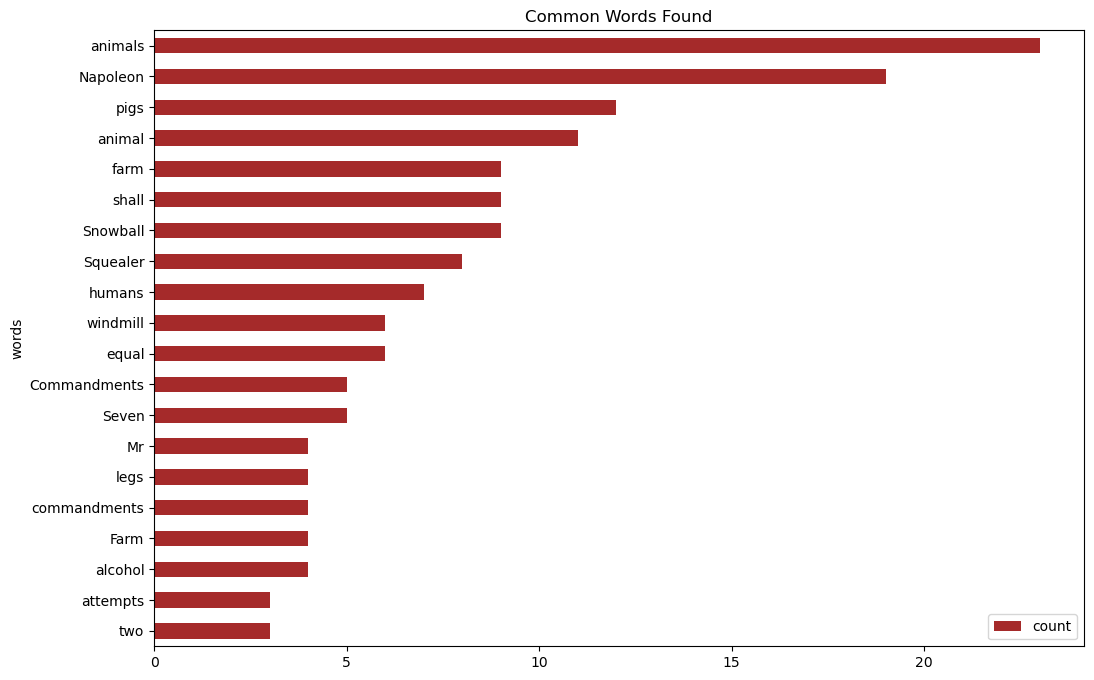

In [38]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

In [49]:
document2 = books_df_clean_ext[books_df_clean_ext['Title'] == 'A Fire Upon the Deep']['Summary'].iloc[0]
word_tokens = word_tokenize(document2)
stopwords_punct = set(punctuation)
stop_words = set(stopwords.words('english'))
all_stop_words = stopwords_punct.union(stop_words)
all_stop_words = all_stop_words.union(set(["''", "``"]))
filtered_tokens = [w for w in word_tokens if not w.lower() in all_stop_words]
filtered_tokens

['novel',
 'posits',
 'space',
 'around',
 'Milky',
 'Way',
 'divided',
 'concentric',
 'layers',
 'called',
 'Zones',
 'constrained',
 'different',
 'laws',
 'physics',
 'allowing',
 'different',
 'degrees',
 'biological',
 'technological',
 'advancement',
 'innermost',
 'Unthinking',
 'Depths',
 'surrounds',
 'galactic',
 'core',
 'incapable',
 'supporting',
 'advanced',
 'life',
 'forms',
 'next',
 'layer',
 'Slow',
 'Zone',
 'roughly',
 'equivalent',
 'real',
 'world',
 'behavior',
 'potential',
 'zone',
 'named',
 'Beyond',
 'support',
 'futuristic',
 'technologies',
 'AI',
 'FTL',
 'travel',
 'outermost',
 'zone',
 'Transcend',
 'contains',
 'galactic',
 'halo',
 'populated',
 'incomprehensibly',
 'vast',
 'powerful',
 'posthuman',
 'entities',
 'human',
 'expedition',
 'investigates',
 'five-billion-year-old',
 'data',
 'archive',
 'offers',
 'possibility',
 'unimaginable',
 'riches',
 'ambitious',
 'young',
 'civilization',
 'Straumli',
 'Realm',
 'expeditions',
 'facility',
 '

In [50]:
cnt2 = Counter()

for word in filtered_tokens:
    cnt2[word] += 1

cnt2.most_common(20)

[('Blight', 11),
 ('ship', 8),
 ('Tines', 7),
 ('Pham', 6),
 ('High', 5),
 ('humans', 5),
 ('Old', 5),
 ('One', 5),
 ('galactic', 4),
 ('world', 4),
 ('human', 4),
 ('civilization', 4),
 ('Lab', 4),
 ('known', 4),
 ('advanced', 3),
 ('Slow', 3),
 ('Zone', 3),
 ('named', 3),
 ('contains', 3),
 ('ships', 3)]

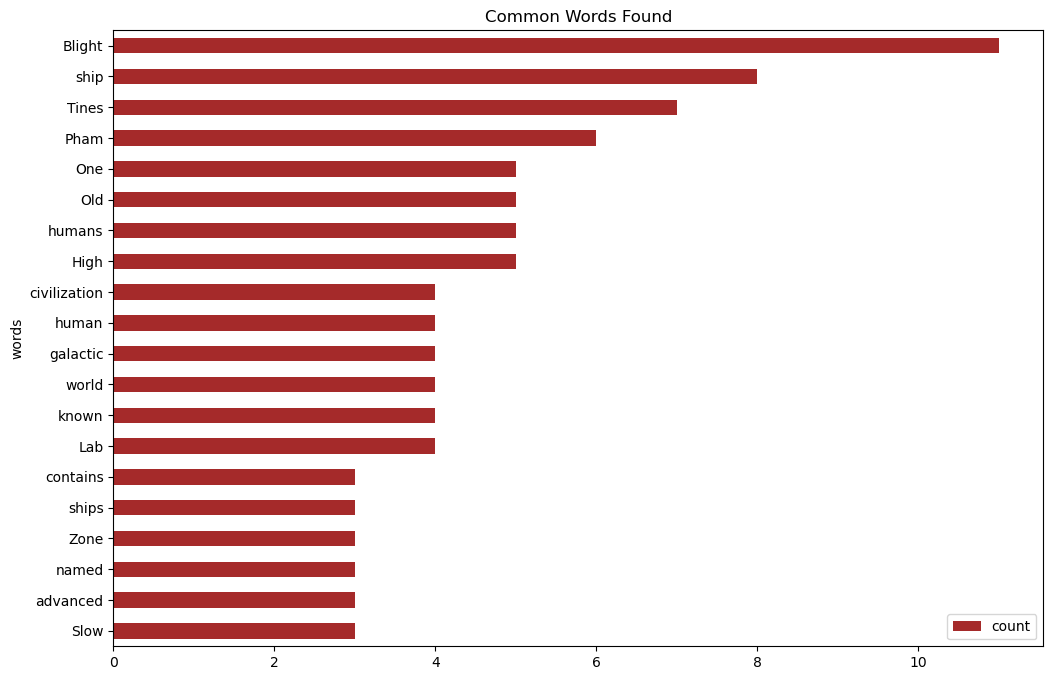

In [51]:
word_freq2 = pd.DataFrame(cnt2.most_common(20),
                             columns=['words', 'count'])
word_freq2.head()
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
word_freq2.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")
ax.set_title("Common Words Found")
plt.show()

In [53]:
def clean_summary(text):
    word_tokens = word_tokenize(text)
    stopwords_punct = set(punctuation)
    stop_words = set(stopwords.words('english'))
    all_stop_words = stopwords_punct.union(stop_words)
    all_stop_words = all_stop_words.union(set(["''", "``"]))
    filtered_tokens = [w for w in word_tokens if not w.lower() in all_stop_words]
    return ' '.join([w for w in filtered_tokens])

books_df_clean_ext['CleanSummary'] = books_df_clean_ext['Summary'].apply(clean_summary)
books_df_clean_ext

,Title,BookId,Author,PublishedDate,Genre,Summary,NewGenre,Fiction,GenreNum,CollectiveSummary,CleanSummary
0,Animal Farm,170448,George Orwell,1945-08-17,Roman à clef Satire Children's literature Spec...,"Old Major, the old boar on the Manor Farm, ca...",fantasy,1,2,"Animal Farm Old Major, the old boar on the Ma...",Old Major old boar Manor Farm calls animals fa...
1,A Clockwork Orange,41817486,Anthony Burgess,1962,Science Fiction Novella Speculative fiction Ut...,"Alex, a teenager living in near-future Englan...",horror,1,4,"A Clockwork Orange Alex, a teenager living in...",Alex teenager living near-future England leads...
2,The Plague,11989,Albert Camus,1947,Existentialism Fiction Absurdist fiction Novel,The text of The Plague is divided into five p...,philosophy,1,7,The Plague The text of The Plague is divided ...,text Plague divided five parts town Oran thous...
3,An Enquiry Concerning Human Understanding,130119,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,philosophy,0,7,An Enquiry Concerning Human Understanding The...,argument Enquiry proceeds series incremental s...
4,A Fire Upon the Deep,77711,Vernor Vinge,NaN,Hard science fiction Science Fiction Speculati...,The novel posits that space around the Milky ...,fantasy,1,2,A Fire Upon the Deep The novel posits that sp...,novel posits space around Milky Way divided co...
...,...,...,...,...,...,...,...,...,...,...,...
10358,The Third Lynx,529644,Timothy Zahn,2007,Science Fiction,The story starts with former government agent...,mystery,1,6,The Third Lynx The story starts with former g...,story starts former government agent Frank Com...
10360,Remote Control,601621,Andy McNab,1997,Thriller Fiction Suspense,The series follows the character of Nick Ston...,thriller,1,11,Remote Control The series follows the charact...,series follows character Nick Stone ex-militar...
10362,The Simpsons: A Complete Guide to Our Favorite...,452298,Matt Groening,1997-11-12,NaN,"{| class=""wikitable"" |- !Seasons covered !Boo...",humor,0,5,The Simpsons: A Complete Guide to Our Favorite...,class= wikitable |- Seasons covered Book title...
10363,Under Wildwood,10353049,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ...",fantasy,1,2,"Under Wildwood Prue McKeel, having rescued he...",Prue McKeel rescued brother Dowager Governess ...


In [62]:
#Length of Summary for books
summary_lengths = [len(word_tokenize(s)) for s in books_df_clean_ext['CleanSummary']]
summary = range(0, books_df_clean_ext.shape[0])
summary_df = pd.DataFrame({'summary_length':summary_lengths})


Text(0.5, 1.0, 'Summary Length Across Books')

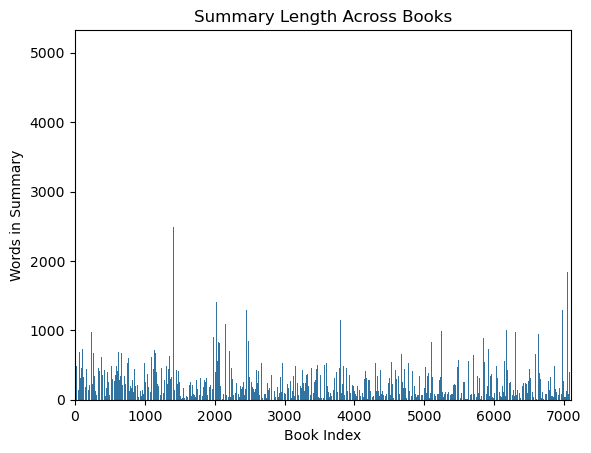

In [64]:
sns.barplot(data=summary_df, x=summary_df.index, y='summary_length')
plt.xticks(np.arange(0, books_df_clean_ext.shape[0], 1000));
plt.xlabel('Book Index')
plt.ylabel('Words in Summary')
plt.title('Summary Length Across Books')

In [65]:
#Named entities in summary
def get_named_entities(text):
    word_tokens = word_tokenize(text)
    pos_tokens = nltk.pos_tag(word_tokens)
    tree = nltk.ne_chunk(pos_tokens)
    named_entities = []
    for word in tree:
        if hasattr(word, 'label'):
            named_entities.append((' '.join(c[0] for c in word.leaves()), word.label()))
    return named_entities
books_df_clean_ext['named entities'] = books_df_clean_ext['CleanSummary'].apply(get_named_entities)
books_df_clean_ext

,Title,BookId,Author,PublishedDate,Genre,Summary,NewGenre,Fiction,GenreNum,CollectiveSummary,CleanSummary,named entities
0,Animal Farm,170448,George Orwell,1945-08-17,Roman à clef Satire Children's literature Spec...,"Old Major, the old boar on the Manor Farm, ca...",fantasy,1,2,"Animal Farm Old Major, the old boar on the Ma...",Old Major old boar Manor Farm calls animals fa...,"[(Old, PERSON), (Manor Farm, PERSON), (England..."
1,A Clockwork Orange,41817486,Anthony Burgess,1962,Science Fiction Novella Speculative fiction Ut...,"Alex, a teenager living in near-future Englan...",horror,1,4,"A Clockwork Orange Alex, a teenager living in...",Alex teenager living near-future England leads...,"[(Alex, PERSON), (England, GPE), (Nadsat Dim, ..."
2,The Plague,11989,Albert Camus,1947,Existentialism Fiction Absurdist fiction Novel,The text of The Plague is divided into five p...,philosophy,1,7,The Plague The text of The Plague is divided ...,text Plague divided five parts town Oran thous...,"[(Plague, PERSON), (Bernard Rieux, PERSON), (M..."
3,An Enquiry Concerning Human Understanding,130119,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...,philosophy,0,7,An Enquiry Concerning Human Understanding The...,argument Enquiry proceeds series incremental s...,"[(Enquiry, PERSON), (Hume, PERSON), (Enquiry H..."
4,A Fire Upon the Deep,77711,Vernor Vinge,NaN,Hard science fiction Science Fiction Speculati...,The novel posits that space around the Milky ...,fantasy,1,2,A Fire Upon the Deep The novel posits that sp...,novel posits space around Milky Way divided co...,"[(Milky Way, PERSON), (Zones, PERSON), (Slow Z..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10358,The Third Lynx,529644,Timothy Zahn,2007,Science Fiction,The story starts with former government agent...,mystery,1,6,The Third Lynx The story starts with former g...,story starts former government agent Frank Com...,"[(Frank Compton, PERSON), (Compton, ORGANIZATI..."
10360,Remote Control,601621,Andy McNab,1997,Thriller Fiction Suspense,The series follows the character of Nick Ston...,thriller,1,11,Remote Control The series follows the charact...,series follows character Nick Stone ex-militar...,"[(Nick Stone, PERSON), (SAS British Intelligen..."
10362,The Simpsons: A Complete Guide to Our Favorite...,452298,Matt Groening,1997-11-12,NaN,"{| class=""wikitable"" |- !Seasons covered !Boo...",humor,0,5,The Simpsons: A Complete Guide to Our Favorite...,class= wikitable |- Seasons covered Book title...,"[(Book, PERSON), (Favorite Family, PERSON), (F..."
10363,Under Wildwood,10353049,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ...",fantasy,1,2,"Under Wildwood Prue McKeel, having rescued he...",Prue McKeel rescued brother Dowager Governess ...,"[(Prue, PERSON), (McKeel, ORGANIZATION), (Dowa..."


In [66]:
entities_length = [len(e) for e in books_df_clean_ext['named entities']]
books = range(0, books_df_clean_ext.shape[0])
entity_df = pd.DataFrame({'entities_length':entities_length})

Text(0.5, 1.0, 'Named Entities Across Books')

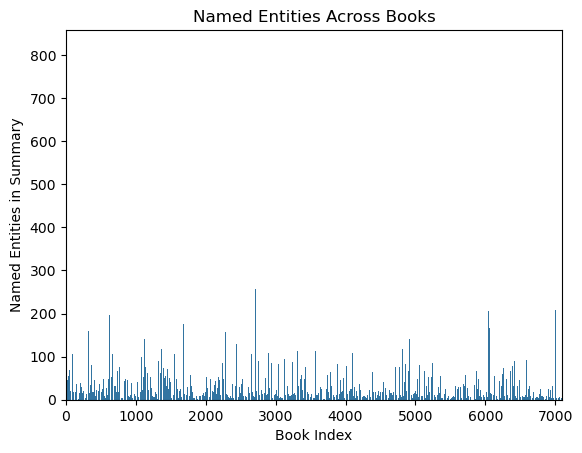

In [67]:
sns.barplot(data=entity_df, x=entity_df.index, y='entities_length')
plt.xticks(np.arange(0, books_df_clean_ext.shape[0], 1000));
plt.xlabel('Book Index')
plt.ylabel('Named Entities in Summary')
plt.title('Named Entities Across Books')

In [54]:

books_df_shuffled = shuffle(books_df_clean_ext, random_state=42)
X = books_df_shuffled[['CleanSummary']]
y = books_df_shuffled['GenreNum']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y,shuffle=True)

tfidf_vec = TfidfVectorizer(use_idf=True)
X_train_vec = tfidf_vec.fit_transform(X_train.squeeze())
X_test_vec = tfidf_vec.transform(X_test.squeeze())
lgr_tfidf = LogisticRegression(fit_intercept=True, max_iter=800)
lgr_tfidf.fit(X_train_vec, y_train.squeeze())
y_predict_train = lgr_tfidf.predict(X_train_vec)
score = accuracy_score(y_train.squeeze(), y_predict_train)
print(score)
y_predict_test = lgr_tfidf.predict(X_test_vec)
score = accuracy_score(y_test.squeeze(), y_predict_test)
print(score)

0.7709507703870725
0.59695603156708
